# Laboratorio 3
## Resultados
Universidad del Valle de Guatemala<br>
Cifrado de Información<br>
Pablo Andrés Zamora Vásquez<br>
Carné 21780



## Parte 1: Rompiendo ECB en Imágenes

In [1]:
from AESFunctions import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

1. Utiliza una imagen BMP o PPM en escala de grises.
2. Cifrar la imagen con AES en modo ECB y visualizar el resultado.
3. Cifrar la misma imagen con AES en modo CBC y comparar.

*Imagen de prueba:*

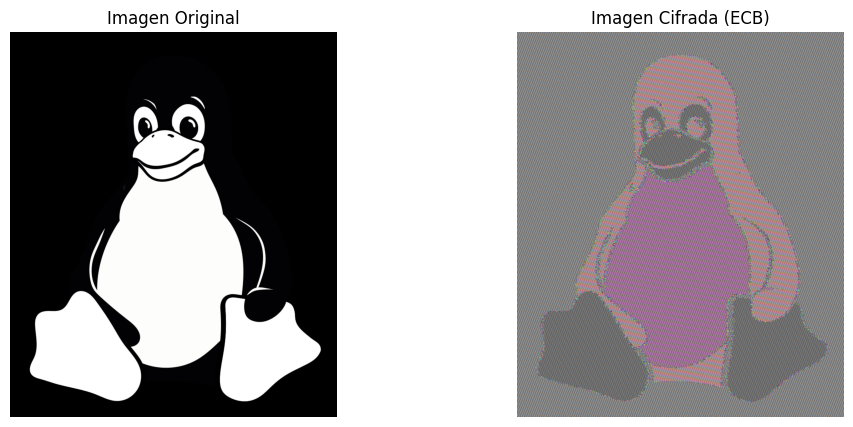

In [2]:
# Cargar la imagen
image_path = "tux.ppm"
image = Image.open(image_path).convert("RGB")

# Convertir la imagen a un array NumPy
arr = np.array(image)

# Convertir a bytes
image_bytes = arr.tobytes()

# Generar llave aleatoria
key = aes_generate_random_key()

# Cifrar imagen
encrypted_bytes = aes_encrypt(image_bytes, key, mode='ECB')

# Convertir los datos cifrados a una matriz NumPy
encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)[:arr.size]  # Ajustar tamaño
encrypted_array = encrypted_array.reshape(arr.shape)  # Restaurar dimensiones

# Crear la imagen cifrada
encrypted_image = Image.fromarray(encrypted_array)

# Guardar la imagen
encrypted_image.save("./encrypted_images/encrypted_image_ecb.png")

# Mostrar imágenes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image)
axs[0].set_title("Imagen Original")
axs[0].axis('off')

axs[1].imshow(encrypted_image)
axs[1].set_title("Imagen Cifrada (ECB)")
axs[1].axis('off')

plt.show()


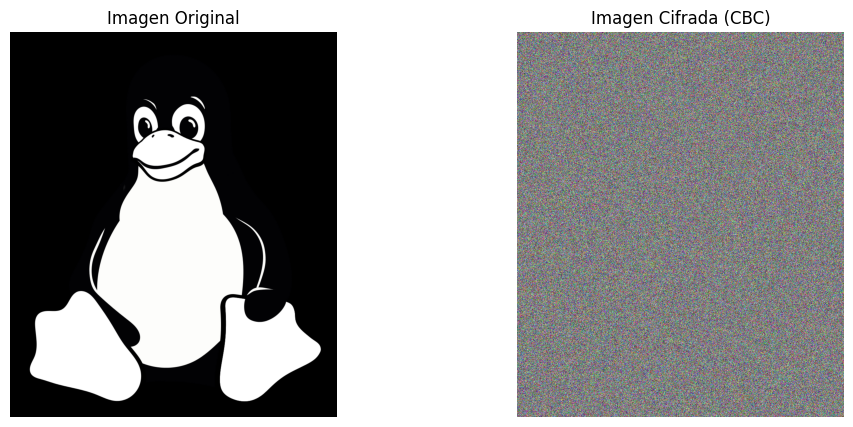

In [3]:
# Cargar la imagen
image_path = "tux.ppm"
image = Image.open(image_path).convert("RGB")

# Convertir la imagen a un array NumPy
arr = np.array(image)

# Convertir a bytes
image_bytes = arr.tobytes()

# Generar llave aleatoria
key = aes_generate_random_key()

# Generar vector de inicialización aleatorio
iv = aes_generate_random_iv()

# Cifrar imagen
encrypted_bytes = aes_encrypt(image_bytes, key, mode='CBC', iv=iv)

# Convertir los datos cifrados a una matriz NumPy
encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)[:arr.size]  # Ajustar tamaño
encrypted_array = encrypted_array.reshape(arr.shape)  # Restaurar dimensiones

# Crear la imagen cifrada
encrypted_image = Image.fromarray(encrypted_array)

# Guardar la imagen
encrypted_image.save("./encrypted_images/encrypted_image_cbc.png")

# Mostrar imágenes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image)
axs[0].set_title("Imagen Original")
axs[0].axis('off')

axs[1].imshow(encrypted_image)
axs[1].set_title("Imagen Cifrada (CBC)")
axs[1].axis('off')

plt.show()


*Imagen propia:*

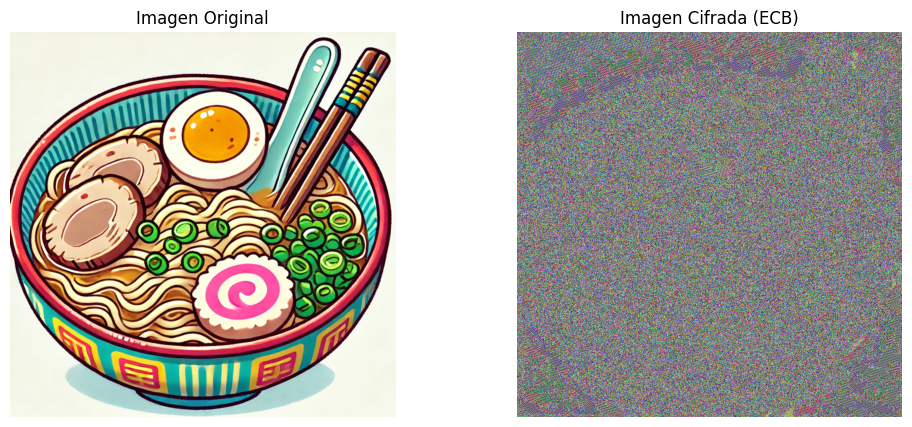

In [4]:
# Cargar la imagen
image_path = "ramen.bmp"
image = Image.open(image_path).convert("RGB")

# Convertir la imagen a un array NumPy
arr = np.array(image)

# Convertir a bytes
image_bytes = arr.tobytes()

# Generar llave aleatoria
key = aes_generate_random_key()

# Cifrar imagen
encrypted_bytes = aes_encrypt(image_bytes, key, mode='ECB')

# Convertir los datos cifrados a una matriz NumPy
encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)[:arr.size]  # Ajustar tamaño
encrypted_array = encrypted_array.reshape(arr.shape)  # Restaurar dimensiones

# Crear la imagen cifrada
encrypted_image = Image.fromarray(encrypted_array)

# Guardar la imagen
encrypted_image.save("./encrypted_images/encrypted_image_ecb.png")

# Mostrar imágenes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image)
axs[0].set_title("Imagen Original")
axs[0].axis('off')

axs[1].imshow(encrypted_image)
axs[1].set_title("Imagen Cifrada (ECB)")
axs[1].axis('off')

plt.show()

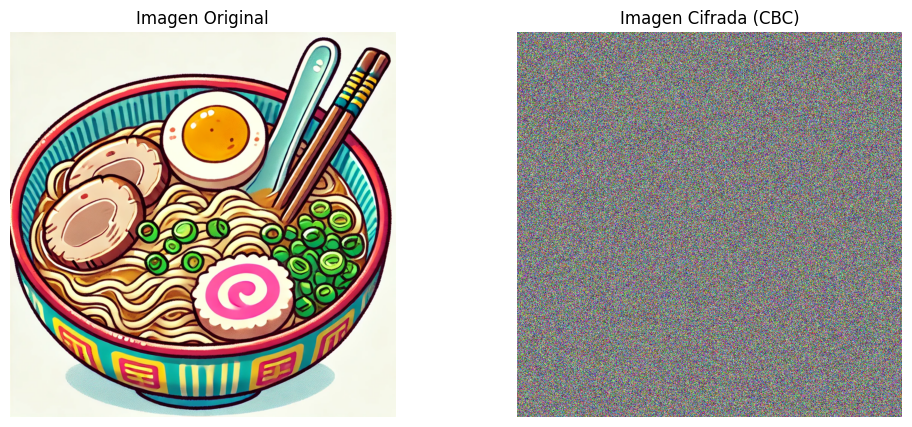

In [5]:
# Cargar la imagen
image_path = "ramen.bmp"
image = Image.open(image_path).convert("RGB")

# Convertir la imagen a un array NumPy
arr = np.array(image)

# Convertir a bytes
image_bytes = arr.tobytes()

# Generar llave aleatoria
key = aes_generate_random_key()

# Generar vector de inicialización aleatorio
iv = aes_generate_random_iv()

# Cifrar imagen
encrypted_bytes = aes_encrypt(image_bytes, key, mode='CBC', iv=iv)

# Convertir los datos cifrados a una matriz NumPy
encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)[:arr.size]  # Ajustar tamaño
encrypted_array = encrypted_array.reshape(arr.shape)  # Restaurar dimensiones

# Crear la imagen cifrada
encrypted_image = Image.fromarray(encrypted_array)

# Guardar la imagen
encrypted_image.save("./encrypted_images/encrypted_image_cbc.png")

# Mostrar imágenes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image)
axs[0].set_title("Imagen Original")
axs[0].axis('off')

axs[1].imshow(encrypted_image)
axs[1].set_title("Imagen Cifrada (CBC)")
axs[1].axis('off')

plt.show()


*¿Por qué el cifrado ECB revela los patrones de la imagen?*

Porque al utilizar **ECB**, cada bloque se cifra de forma independiente. Esto significa que si dos bloques de datos son iguales, estos bloques de datos cifrados también lo serán. Por esta razón, al utilizarlo para cifrar una imagen, se preservan patrones, haciendo que aún sea reconocible, tal como se observó al cifrar la imagen con AES en este modo de operación

*¿Cómo cambia la apariencia con CBC?*

Tal como se observó en la imagen cifrada con AES usando este modo de operación, se observan pixeles completamente aleatorios o "ruido". Esto sucede porque **CBC** utiliza un vector de inicialización y cada bloque se cifra combinándose con el anterior, distribuyendo así el cifrado. Esto elimina los patrones visibles de una imagen. 

*¿Qué tan seguro es usar ECB para cifrar datos estructurados?*

No es seguro usar ECB para cifrar datos estructurados ya que este modo de operación cifra cada bloque de manera **independiente**, lo que hace posible reconocer patrones en los mensajes cifrados. Además, este modo de operación **no utiliza un vector de inicialización**, por lo que no hay aleatorización; es decir, datos idénticos producen salidas idénticas. Estos aspectos hacen que los mensajes cifrados sean susceptibles a que un atacante sea capaz de reordenar cada bloque.

## Parte 2: Capturando Cifrado en Red con Wireshark

1. Crear un script que envíe mensajes cifrados con AES-CBC a un servidor.
2. Capturar el tráfico con Wireshark y analizar los paquetes.

*Enviando un mensaje sin cifrar:*

**Cliente:**

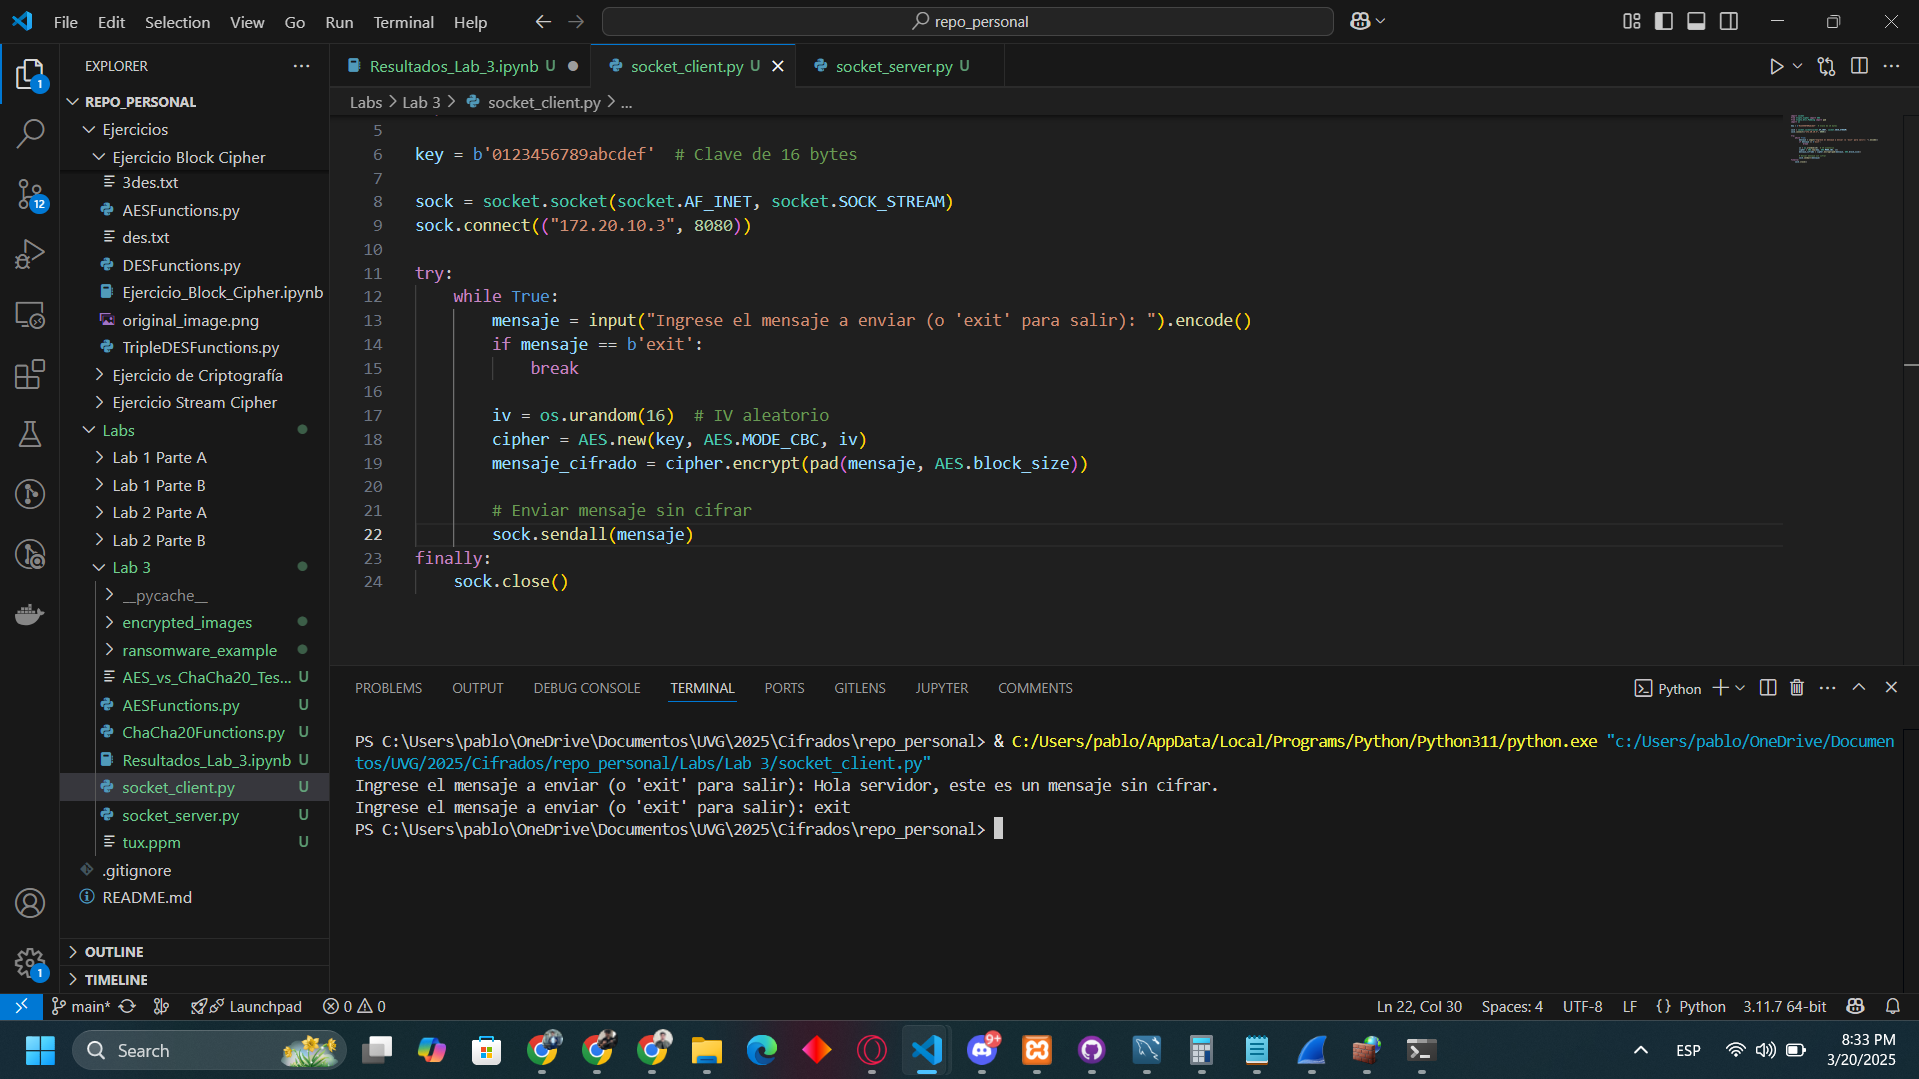

**Servidor:**

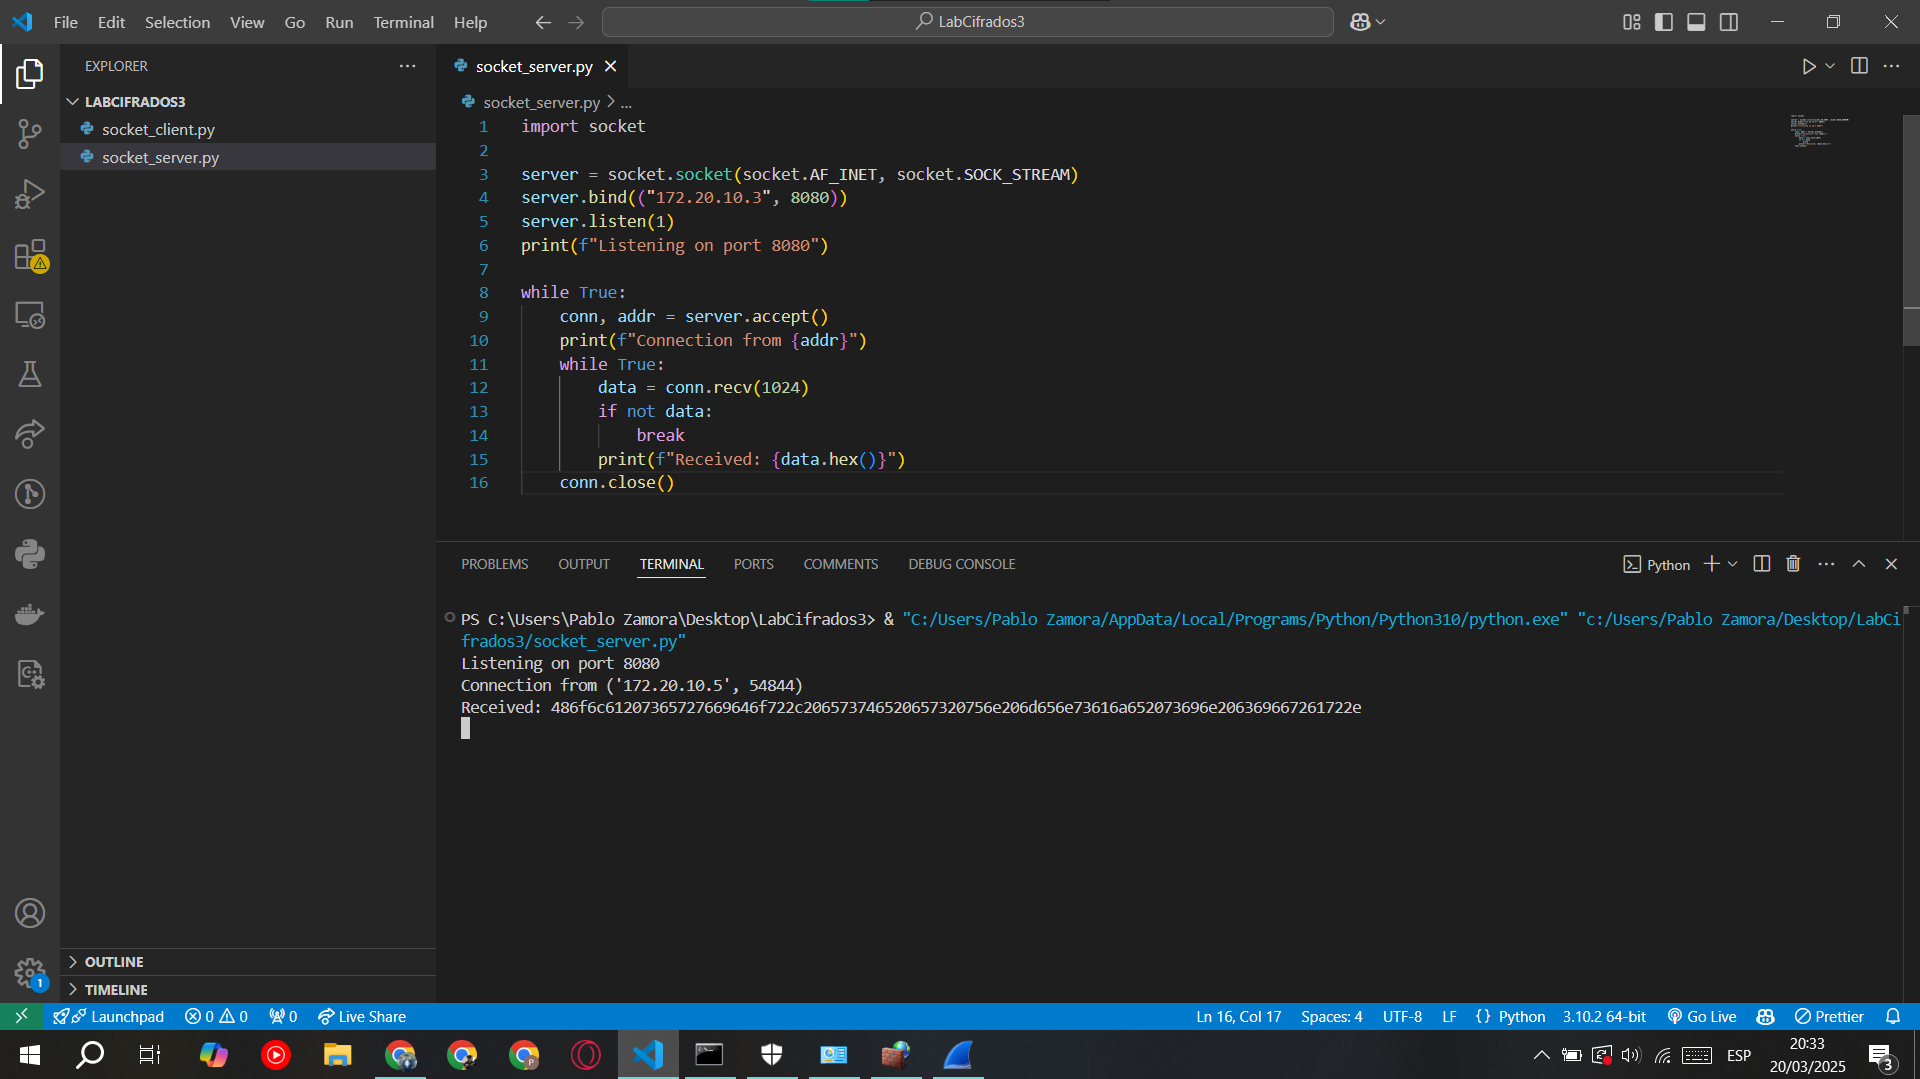

**Wireshark:**

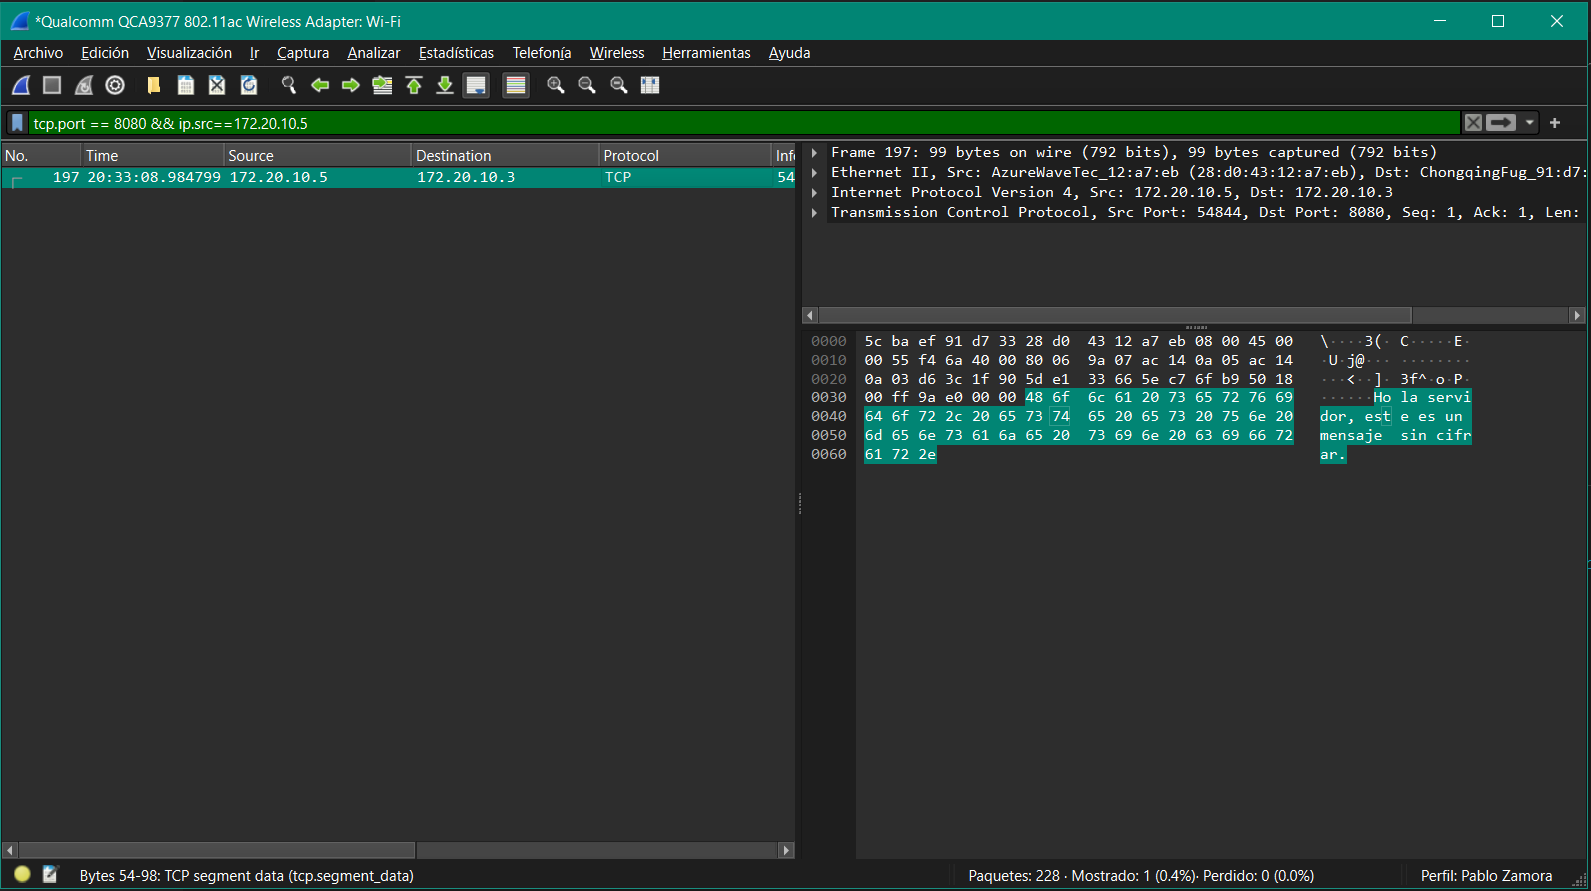

*Enviando un mensaje cifrado:*

**Cliente:**

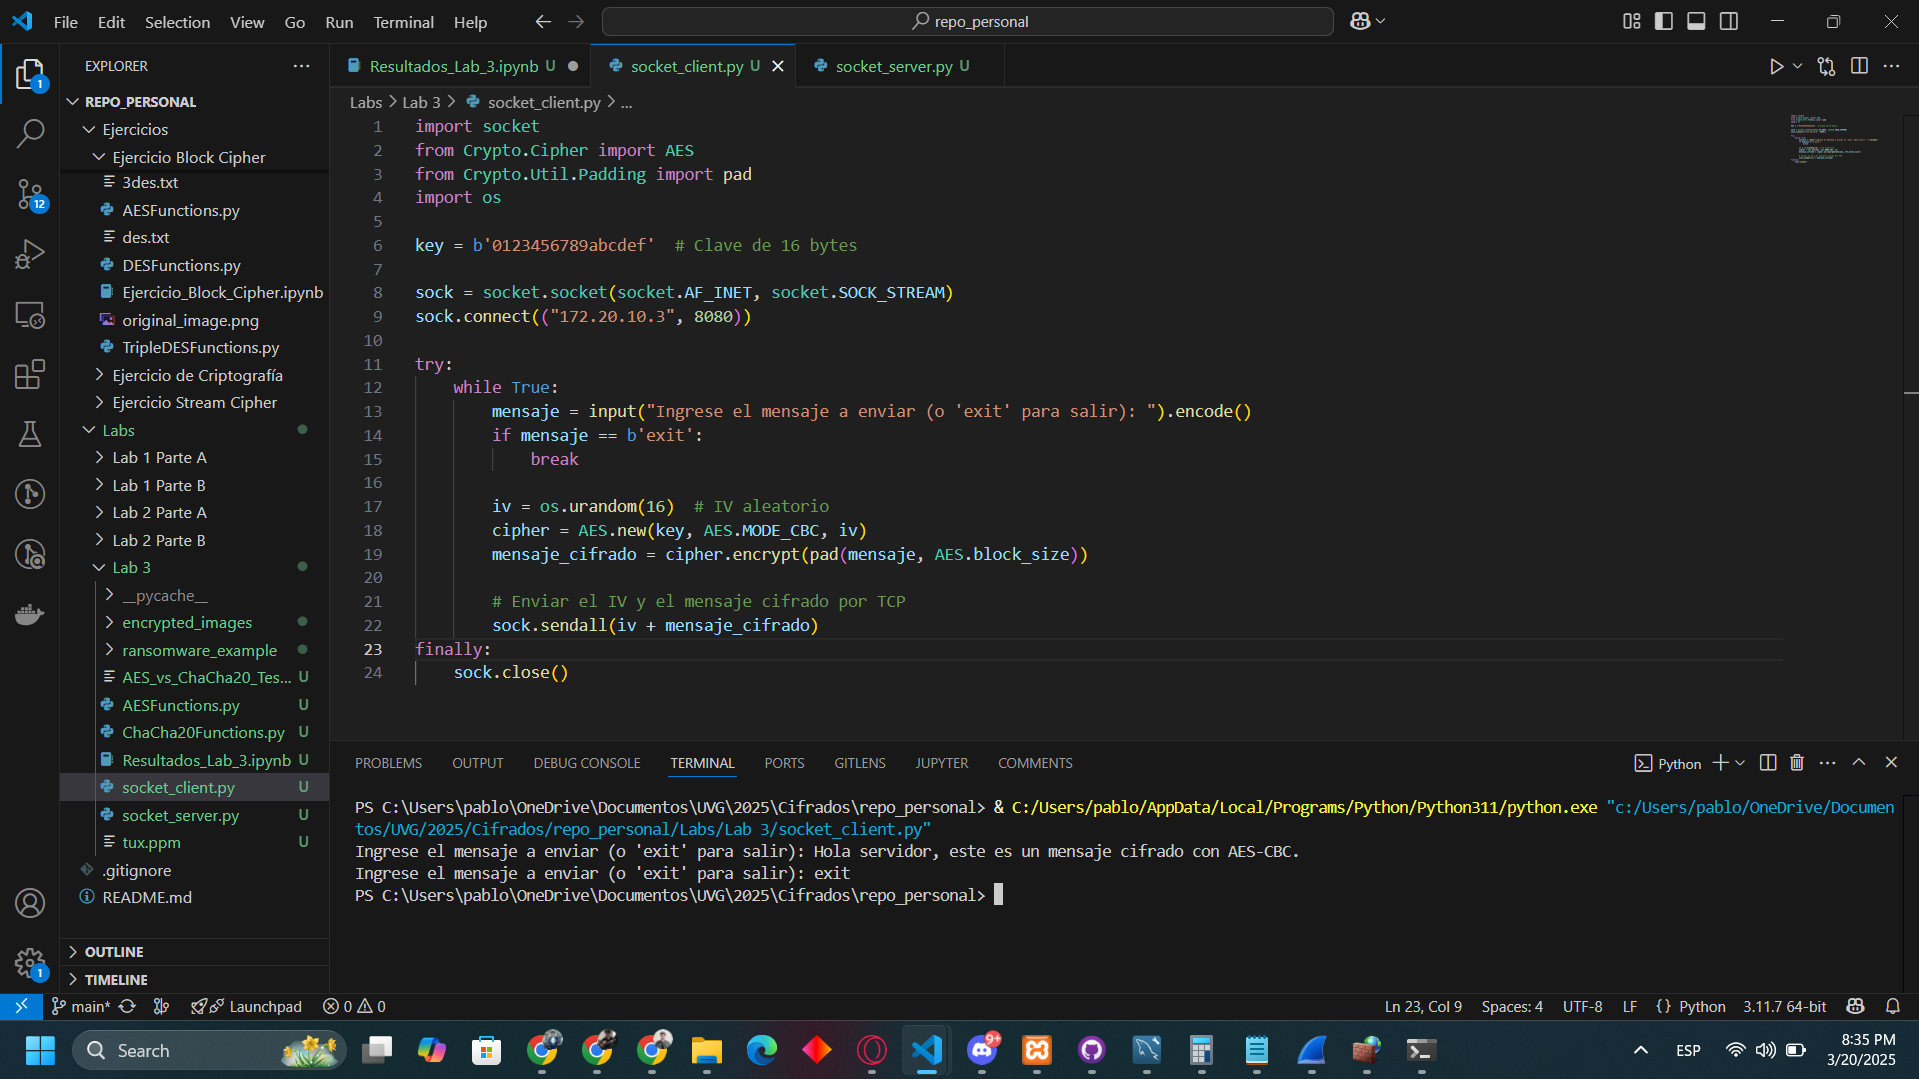

**Servidor:**

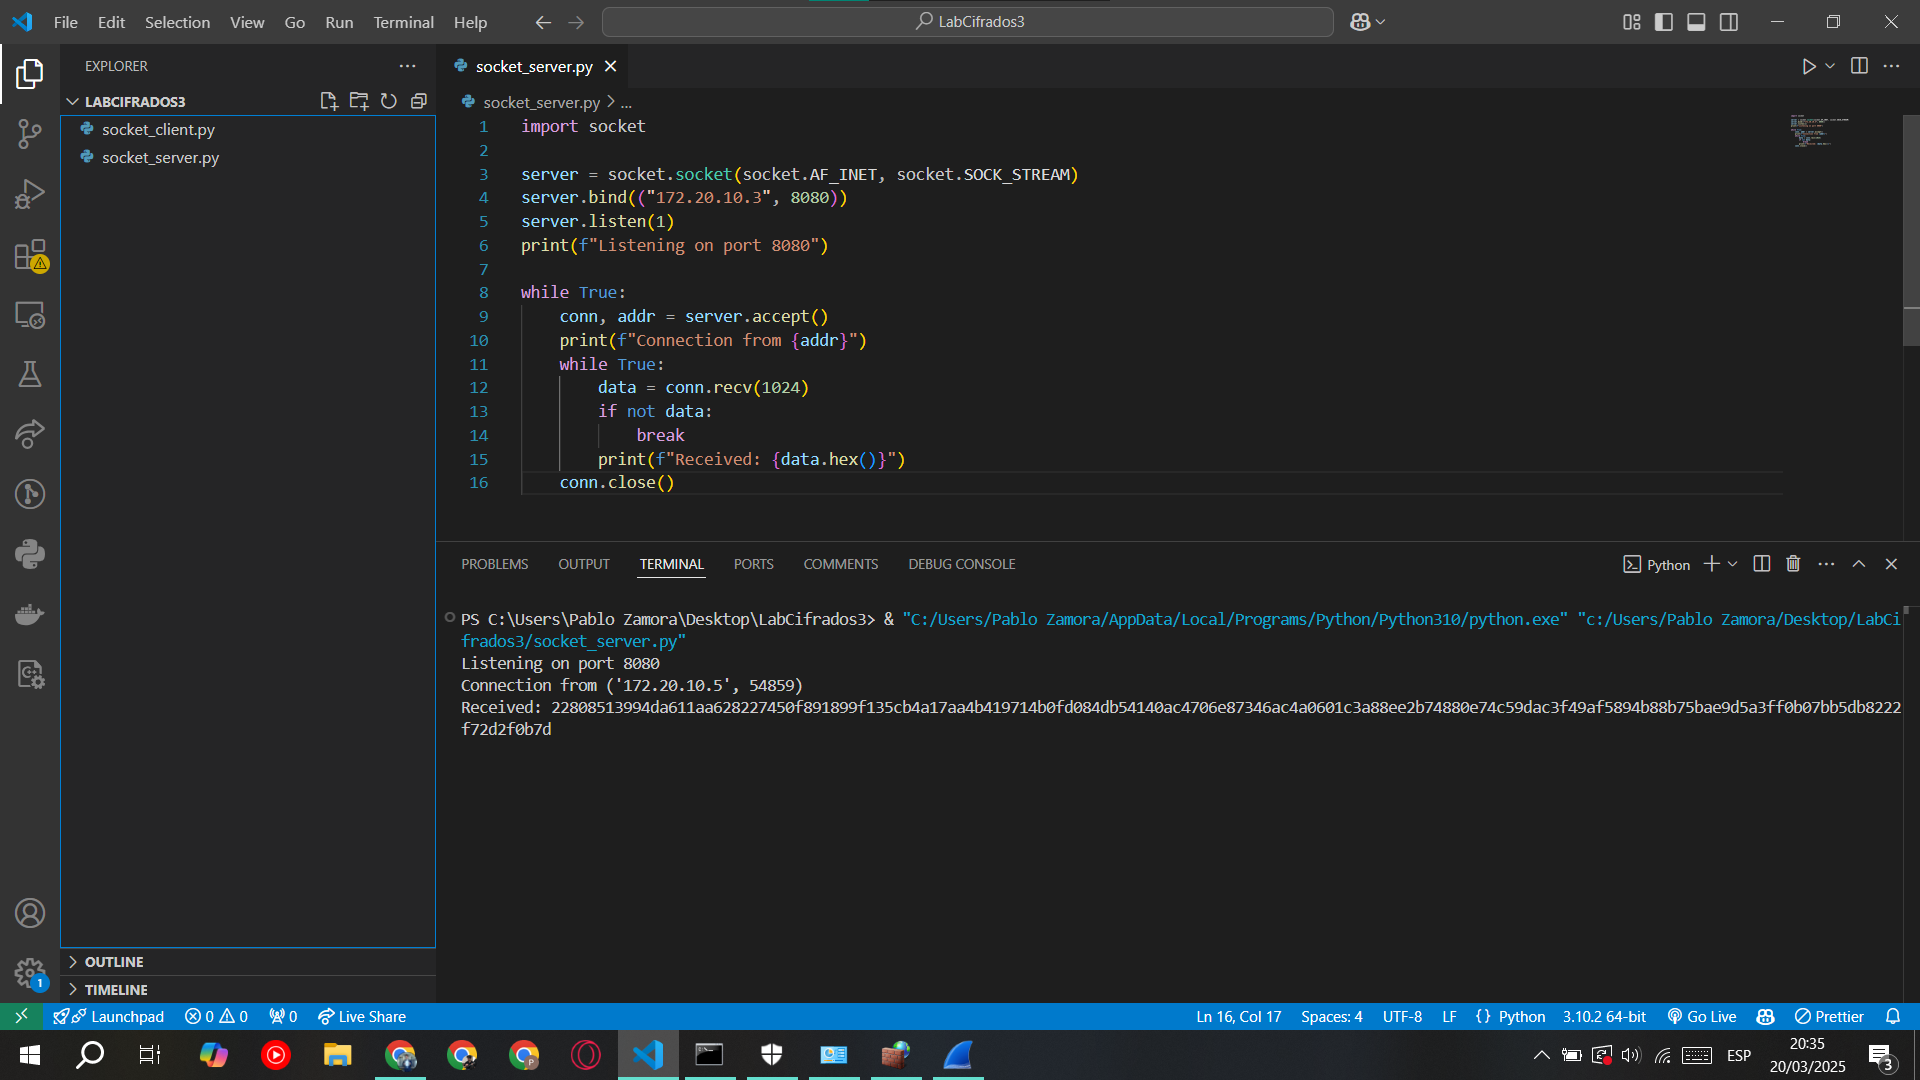

**Wireshark:**

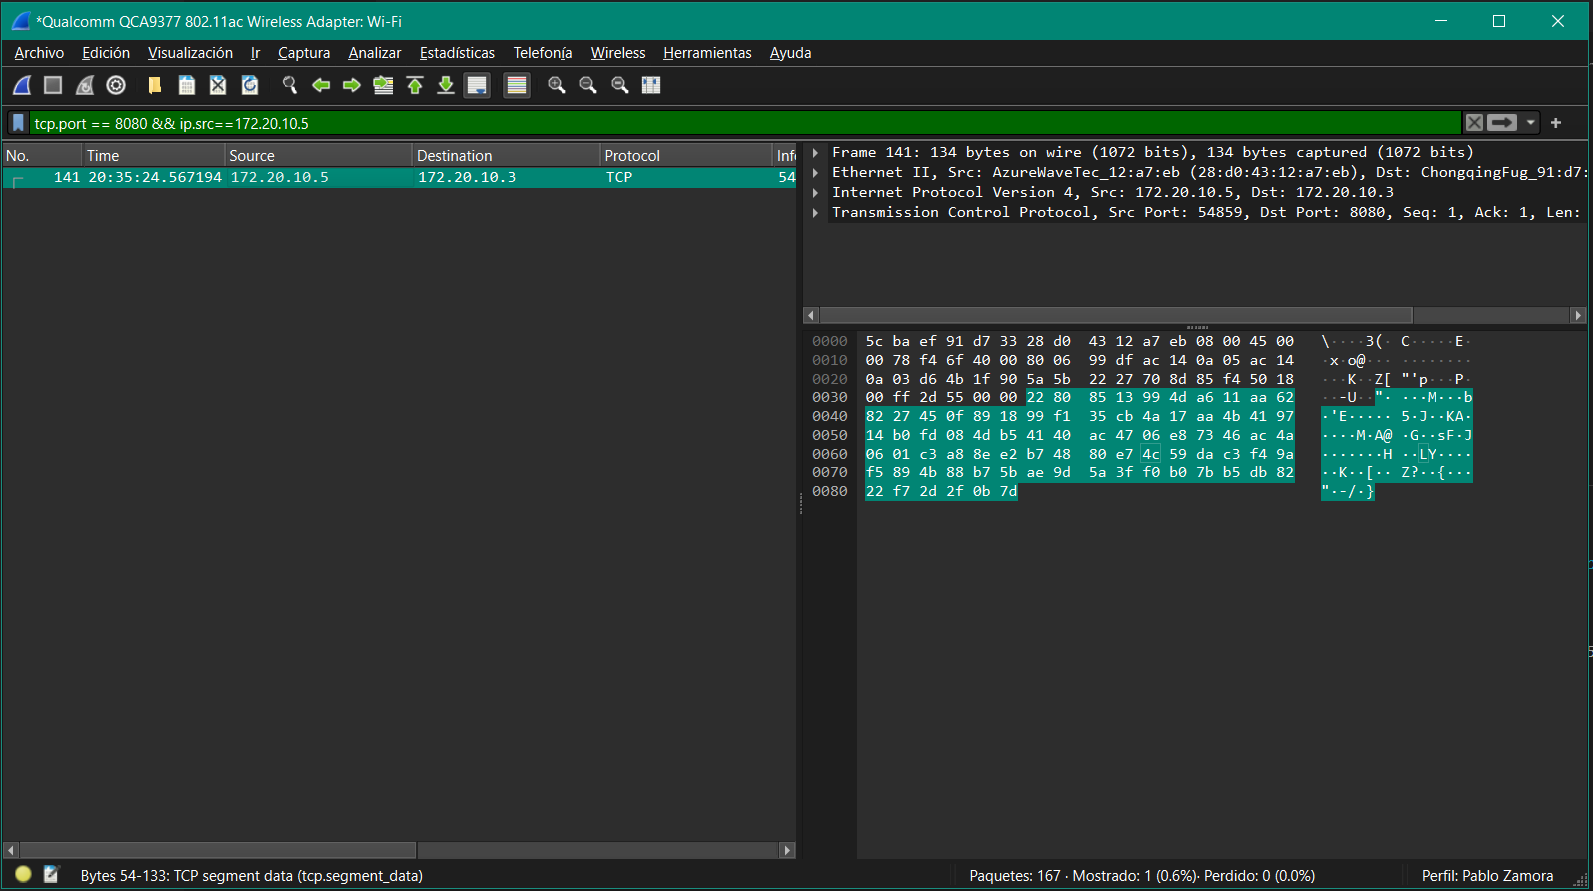

*Enviando un archivo:*

**Archivo a enviar:**

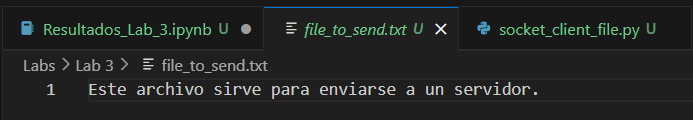

Enviando archivo sin cifrar:

**Cliente:**

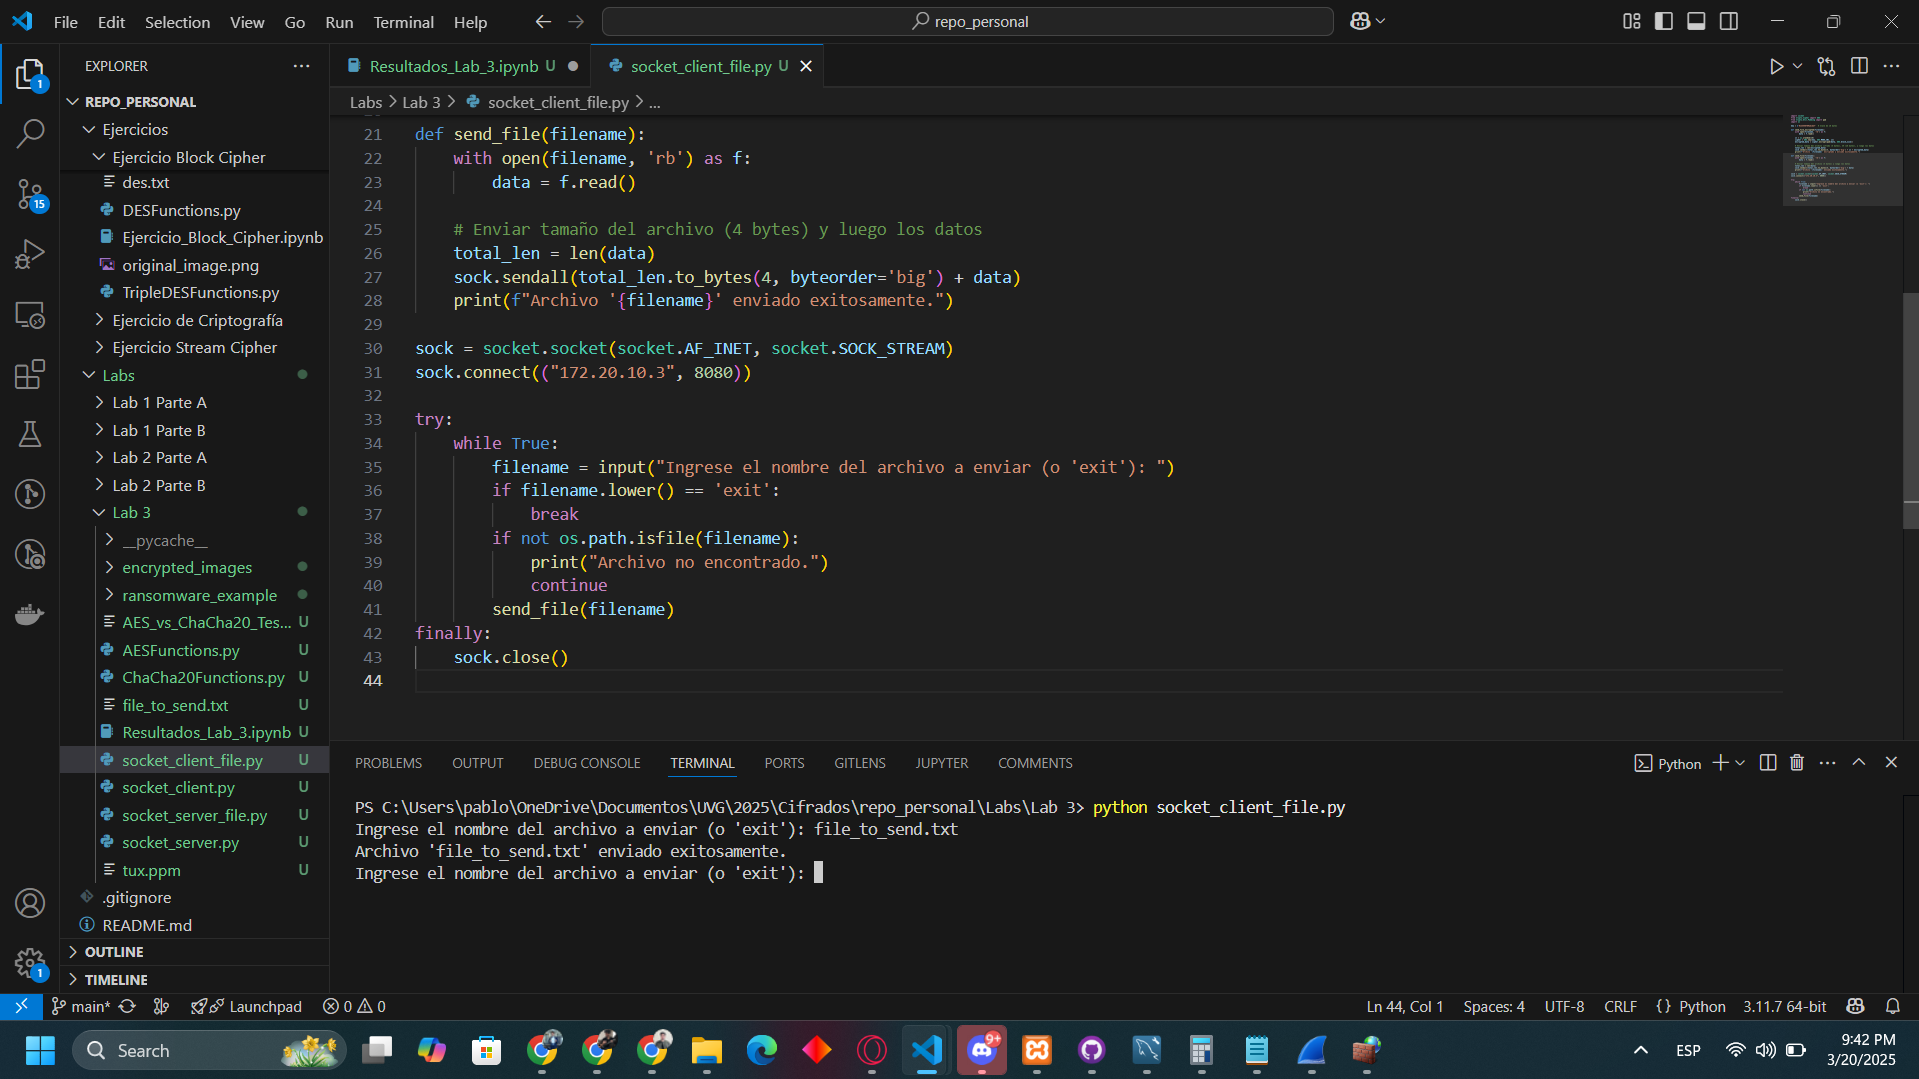

**Servidor:**

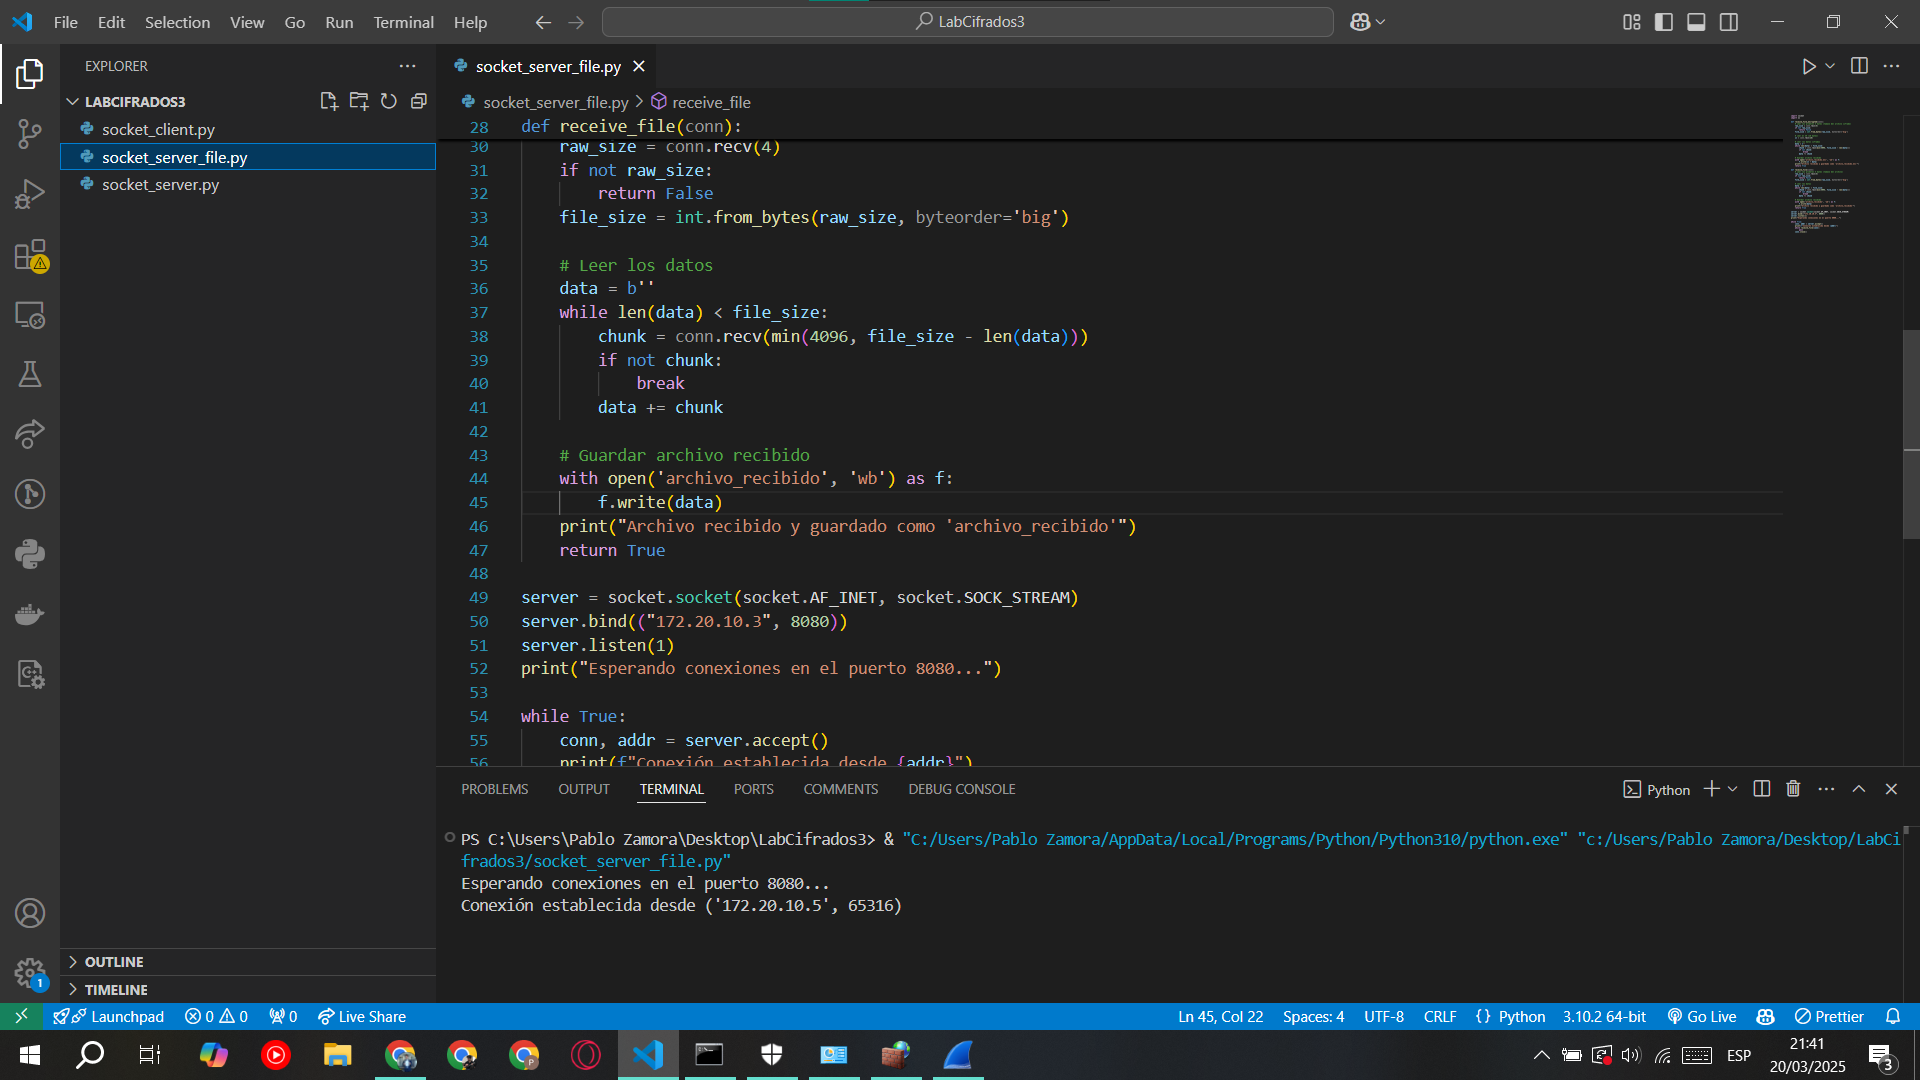
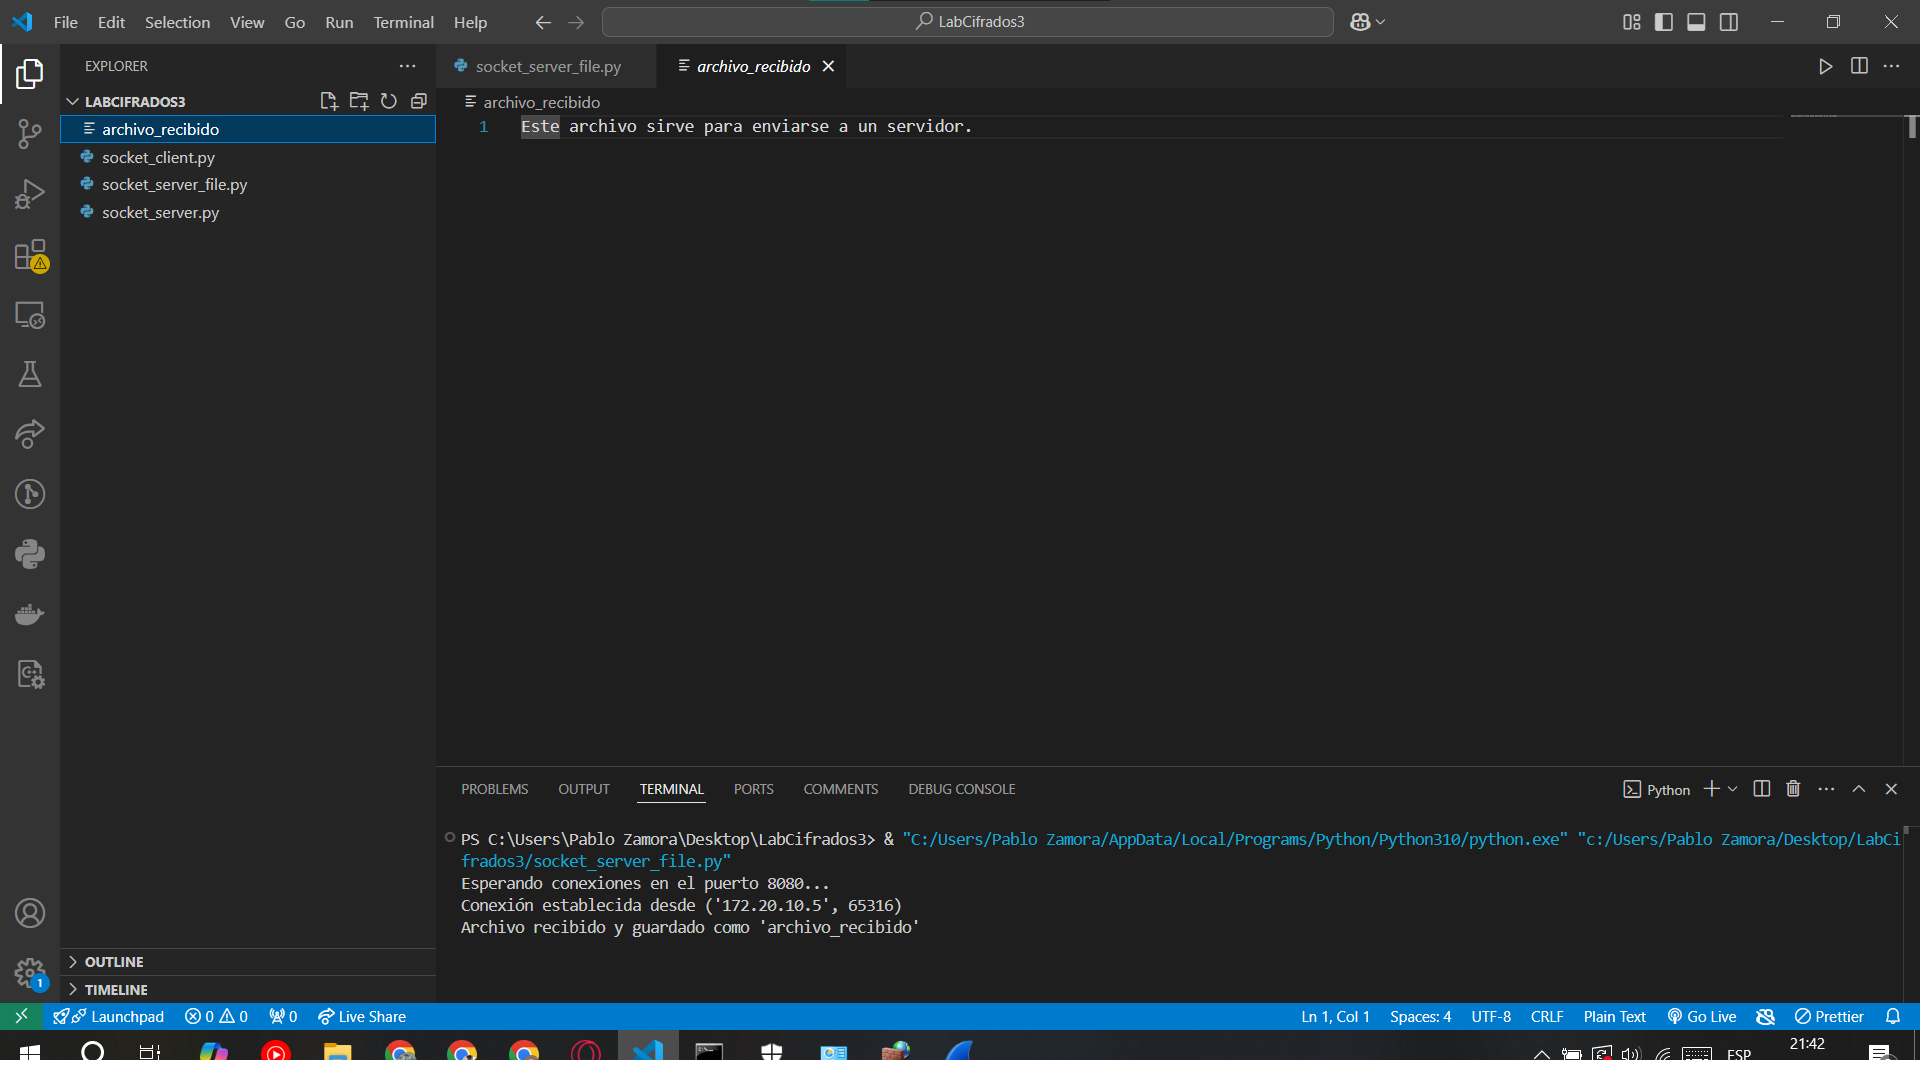

**Wireshark:**

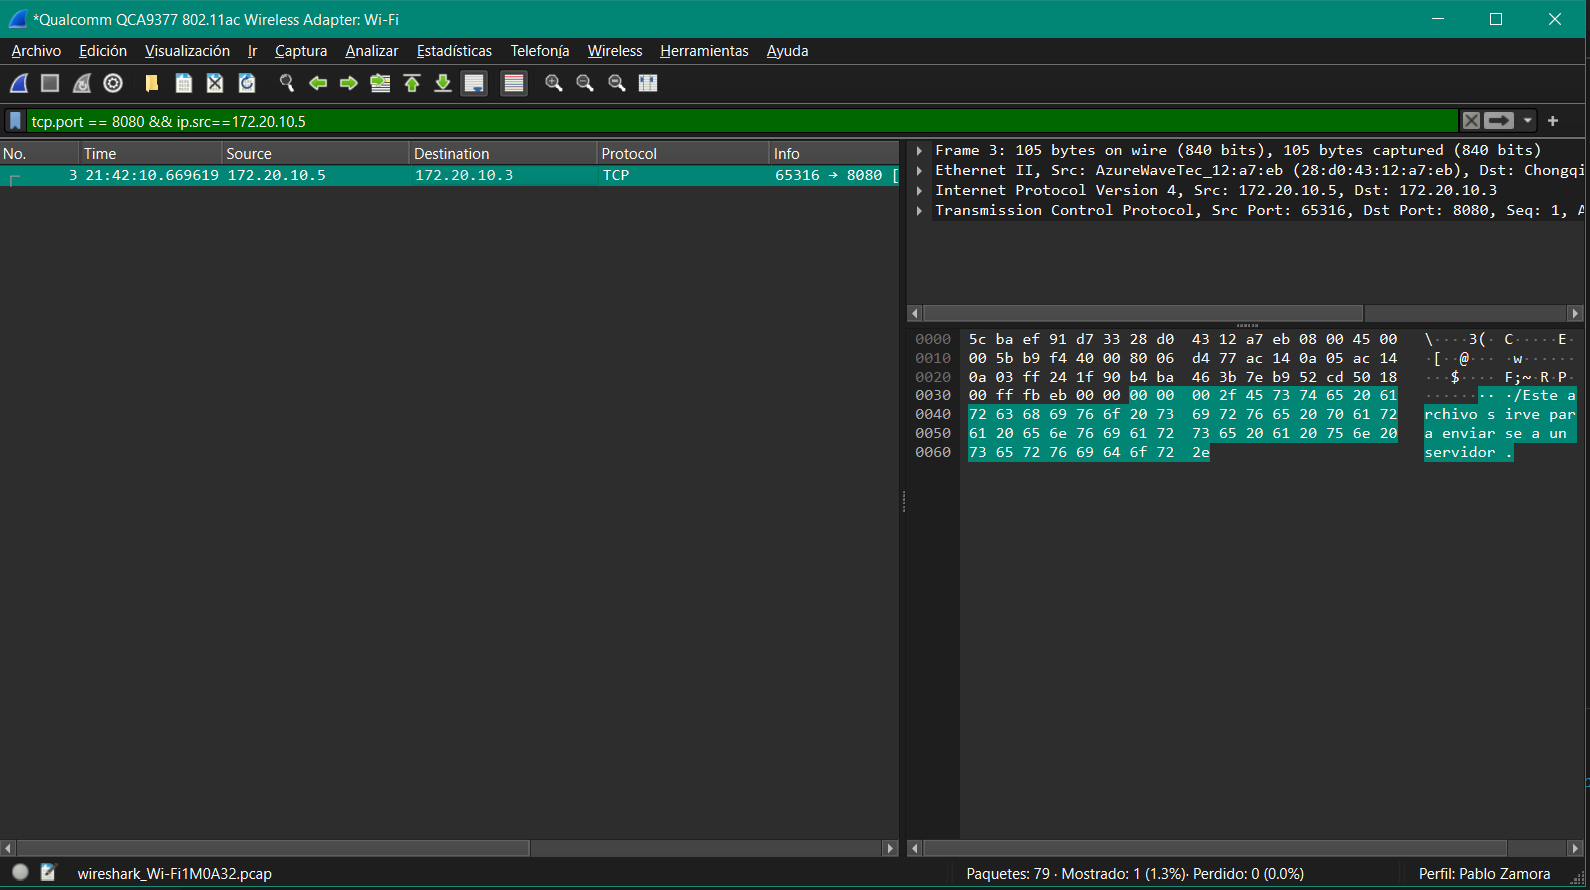

*Enviando archivo cifrado:*

**Cliente:**

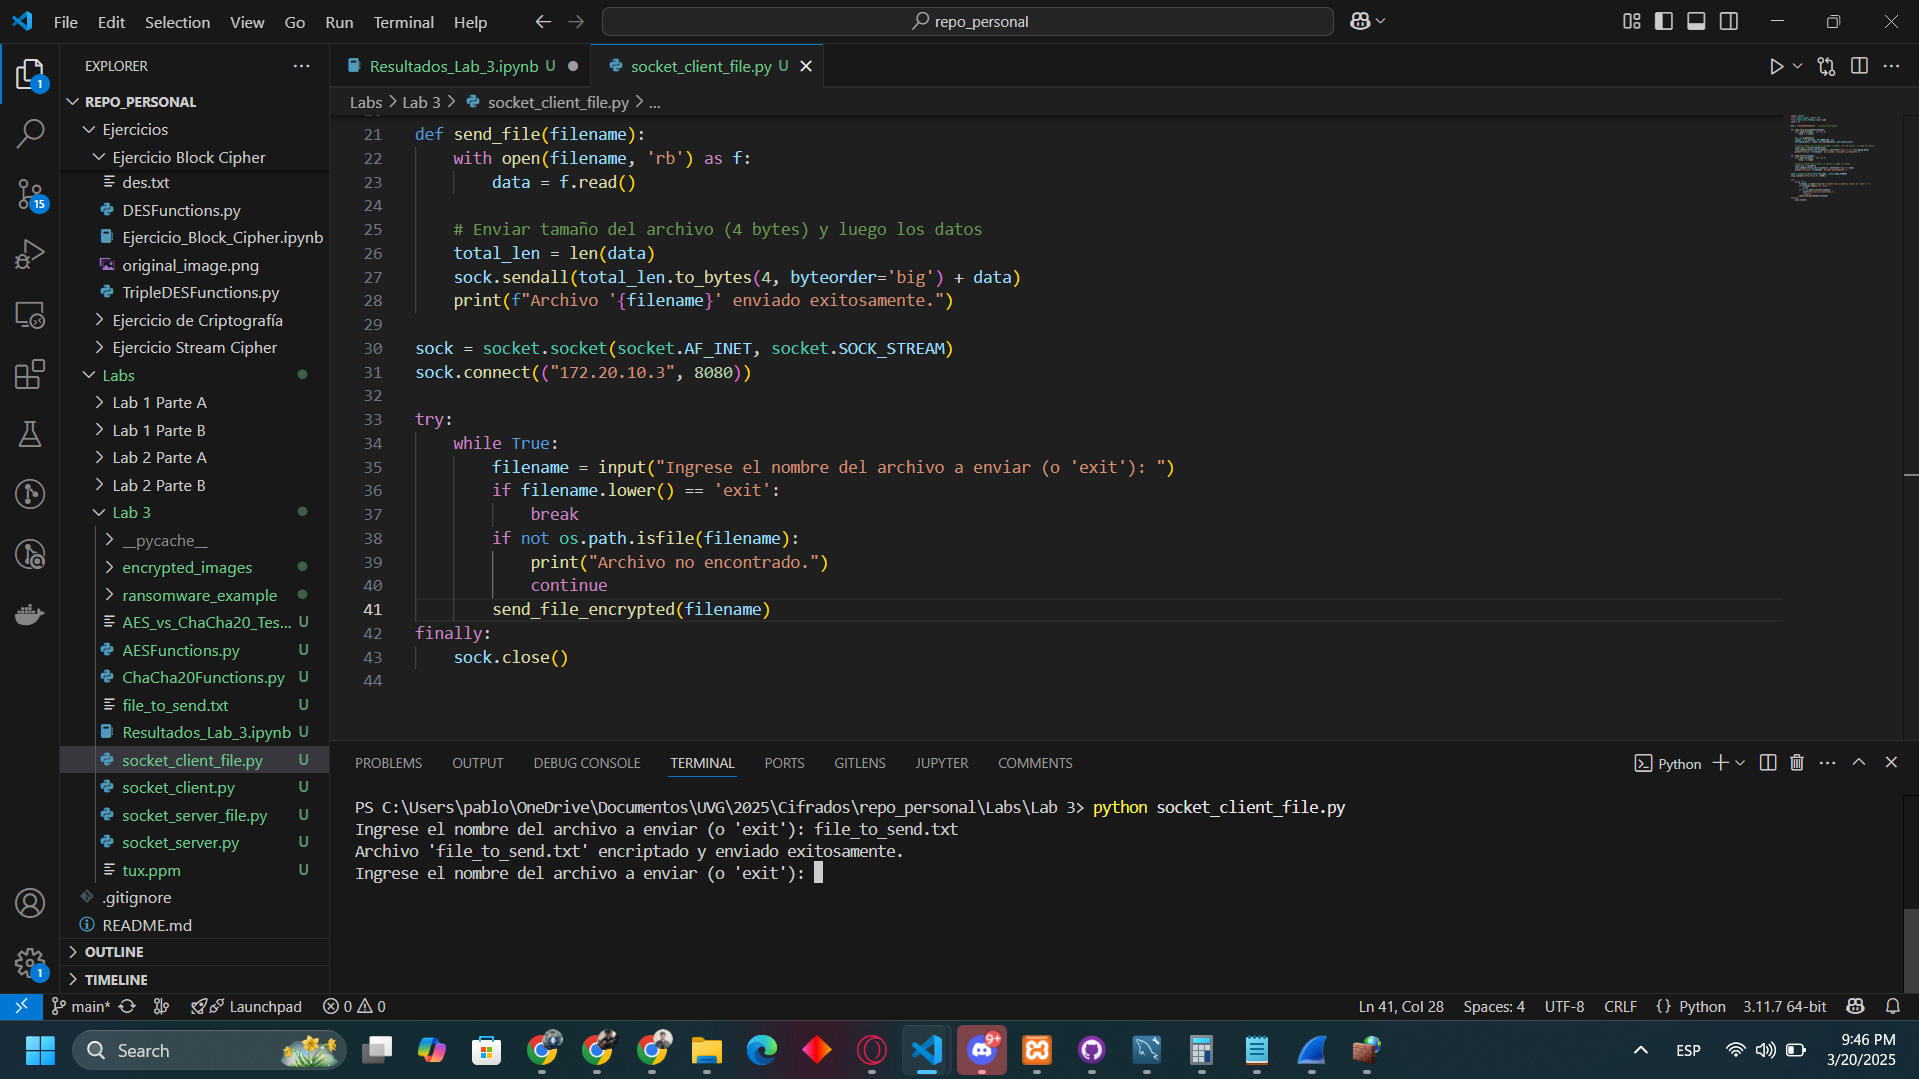

**Servidor:**

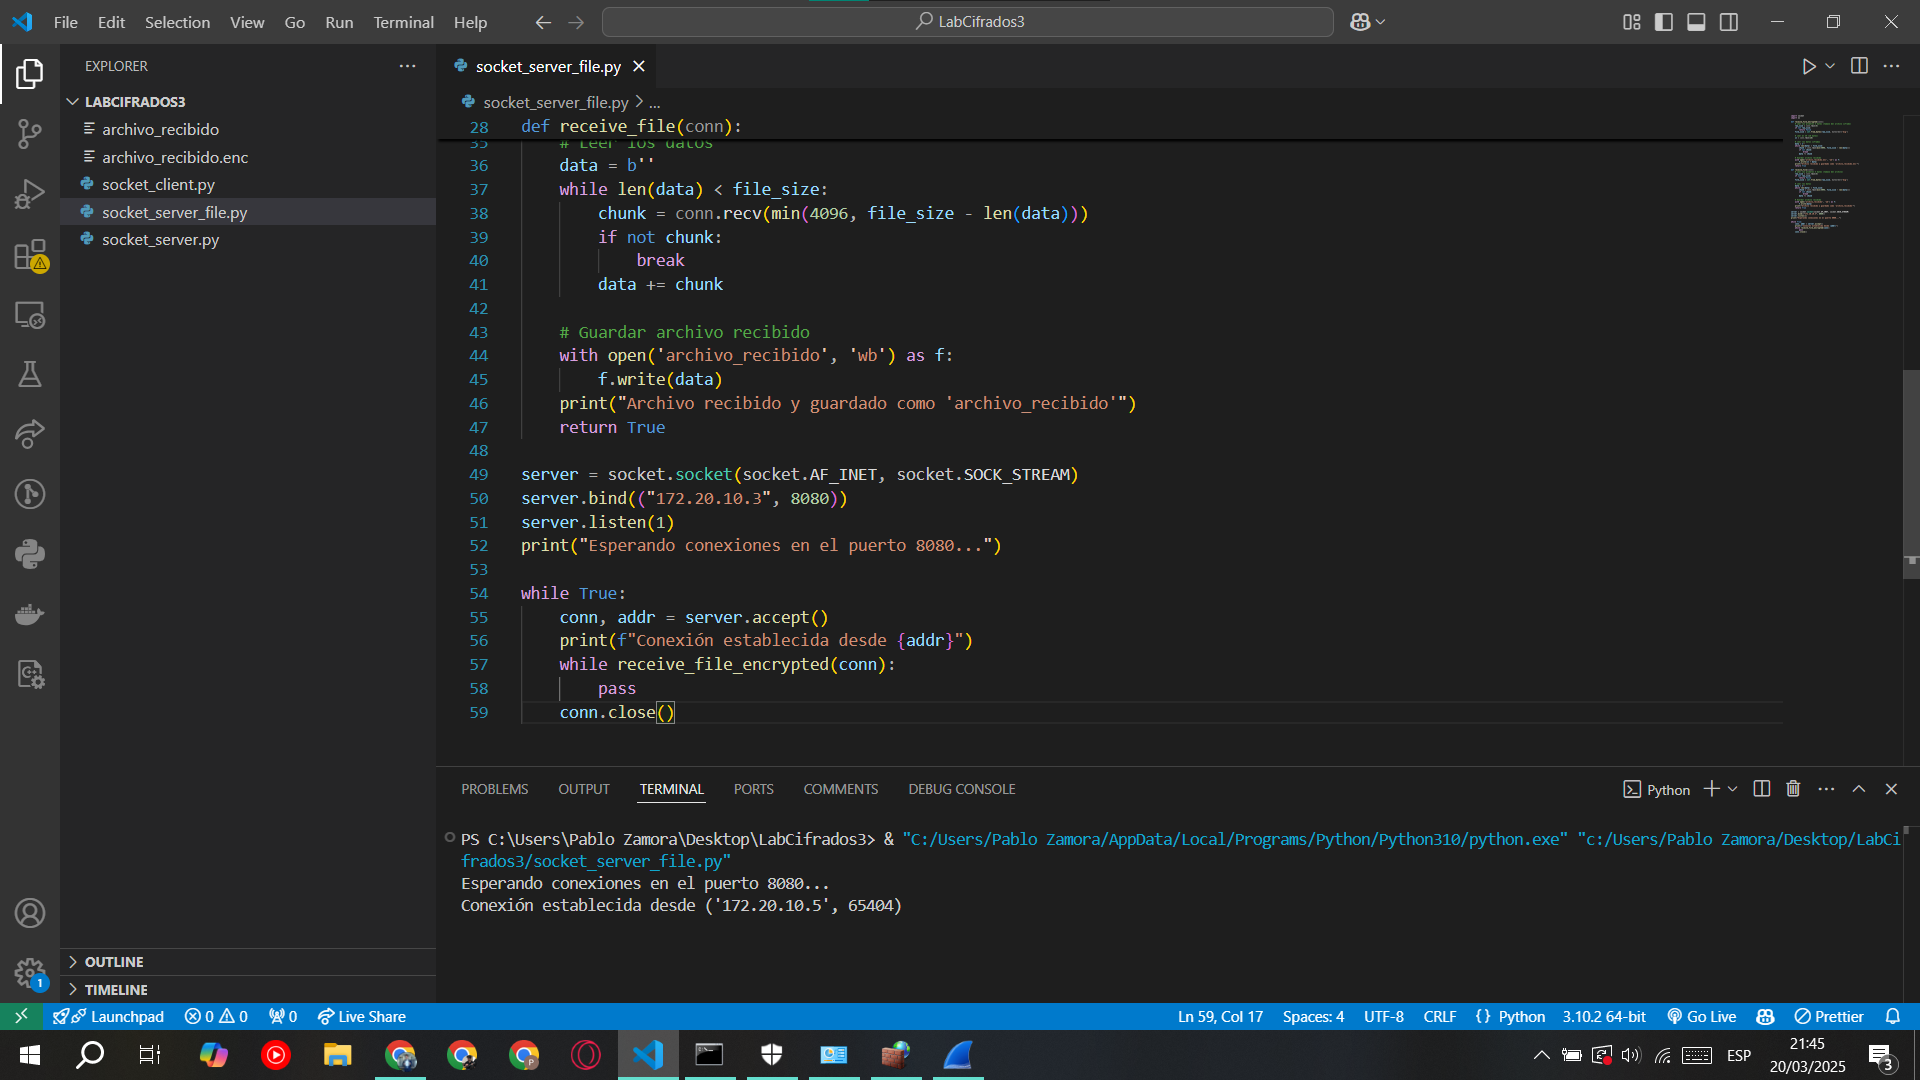
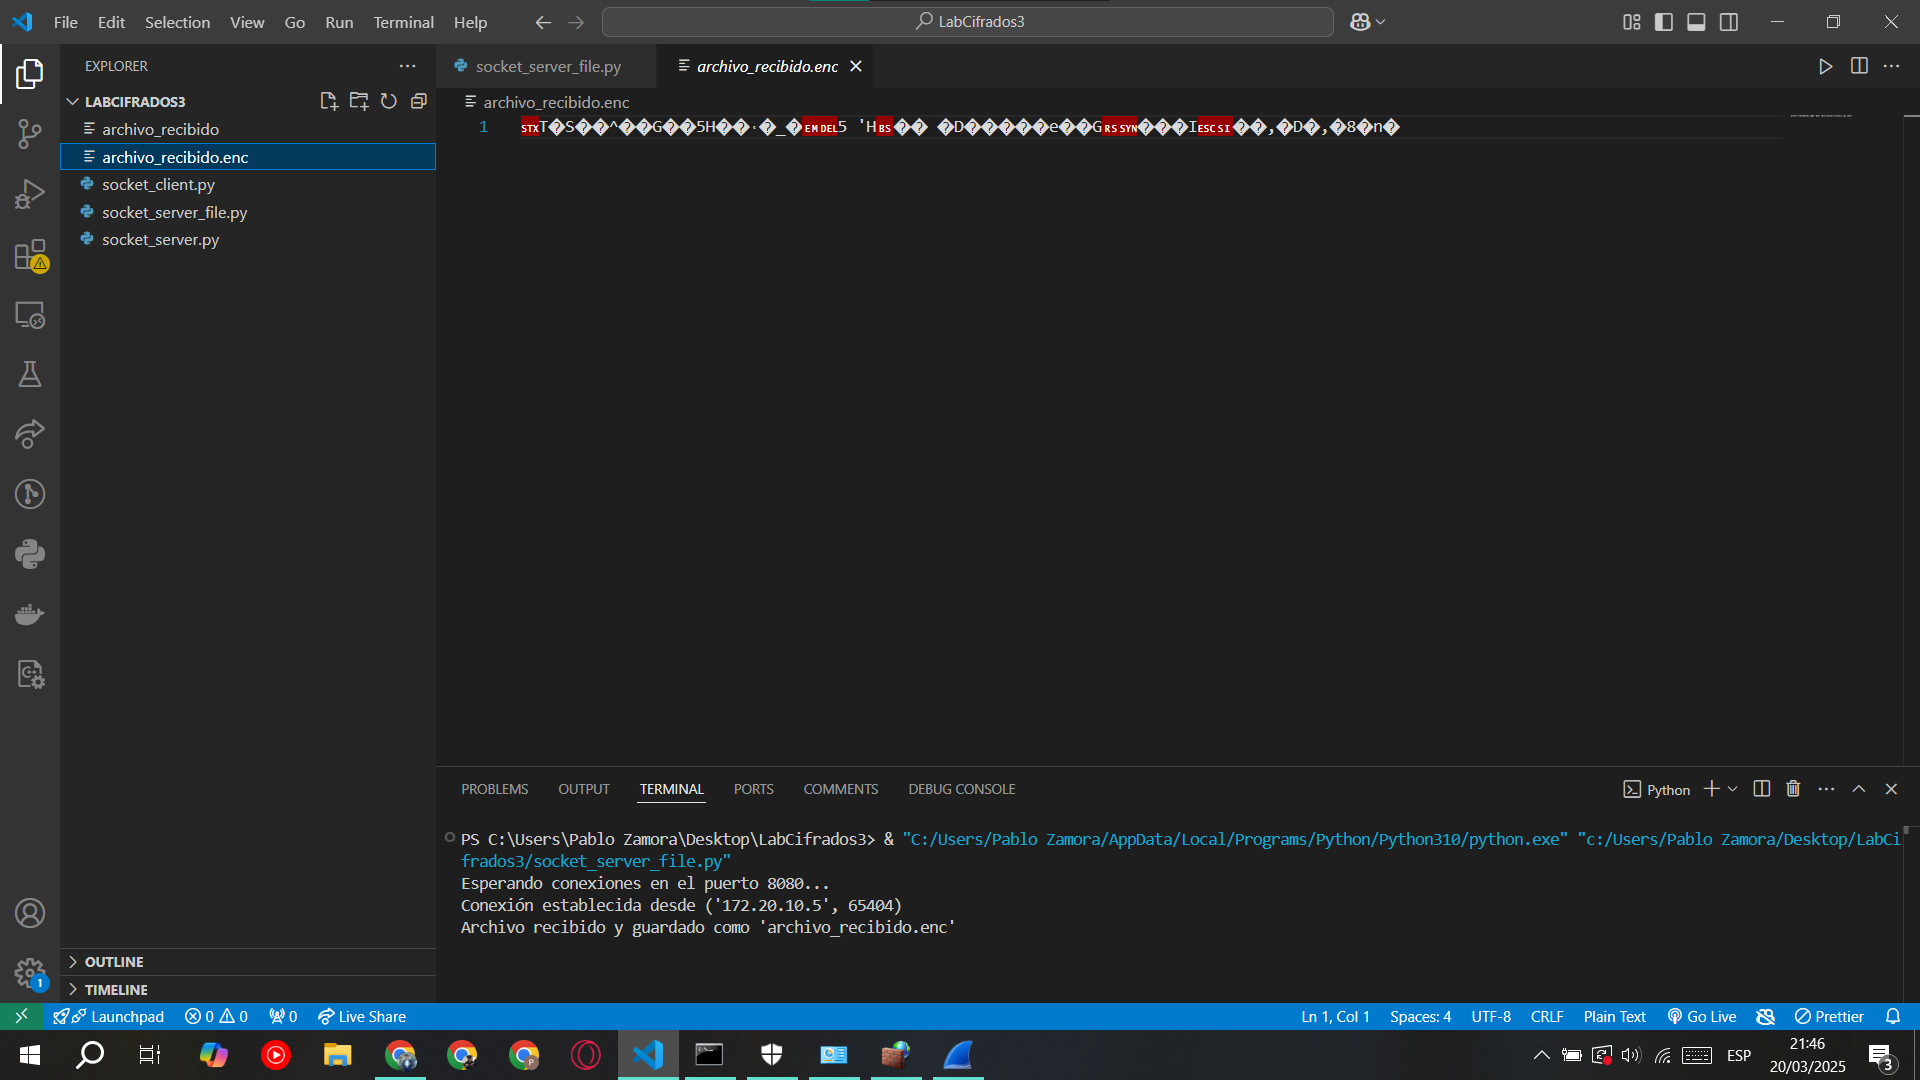

**Wireshark:**

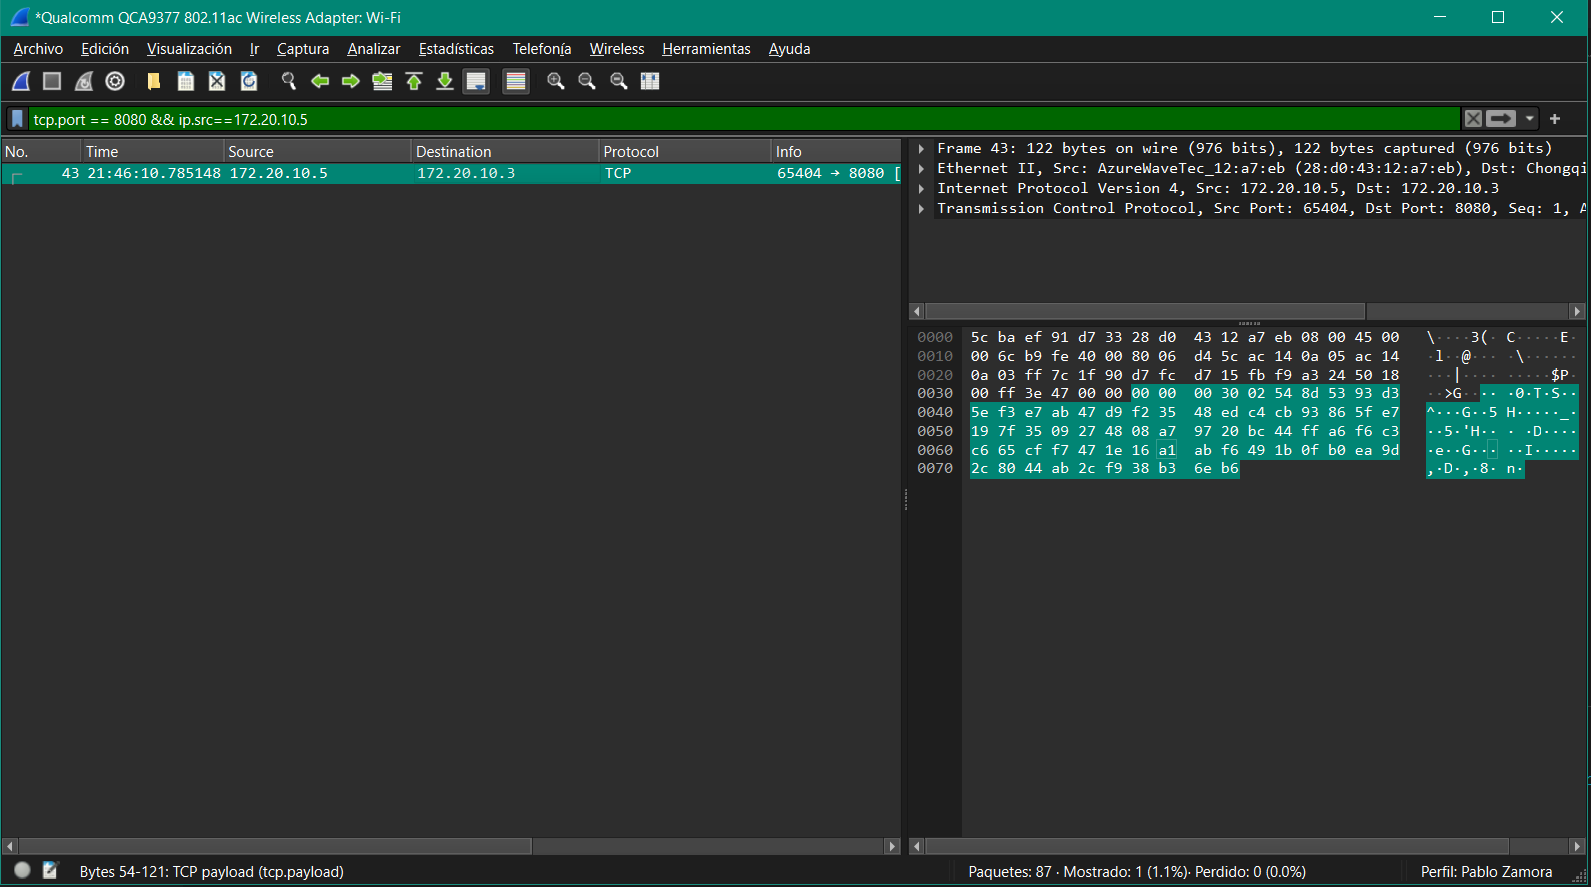

Como puede observarse, al capturar el paquete tanto del mensaje como del archivo sin cifrar, puede distinguirse el text original dentro del *payload*; mientras que en en el mensaje y archivo cifrados, no es posible comprender a simple vista qué dice el mensaje.

*¿Se puede identificar que los mensajes están cifrados con AES-CBC?*

A simple vista, no hay ningún aspecto del paquete enviado que permita distinguir que el mensaje está cifrado con AES-CBC, a excepción del tamaño del **payload**, el cual siempre es de un múltiplo de 16 bytes, debido a que la longitud de bloque en AES siempre debe ser de 16 bytes. Por esta razón, a veces es necesario agregar *padding* al mensaje original. Esto podría ser un indicador de que se usó este algoritmo para cifrar el mensaje.

*¿Cómo podríamos proteger más esta comunicación?*

Al utilizar AES ya se están previniendo ataques de tipo *meet-in-the-middle* gracias a la complejidad no lineal del algoritmos. Además, se está generando un IV aleatorio con cada mensaje enviado. Sin embargo, podría protegerse aún más esta comunicación:
- Utilizando un modo de operación que tenga autenticación integrada, como GCM.
- Agregando una firma digital para evitar que un atacante modifique el mensaje cifrado sin ser detectado.
- Utilizando un protocolo de comunicación más seguro, como SSH.


## Parte 3: Implementando un Cifrado de Flujo con ChaCha20

In [2]:
from ChaCha20Functions import *

1. Implementar ChaCha20 para cifrar y descifrar mensajes.

In [3]:
plaintext = "Este es un mensaje de prueba para ChaCha20."

key = chacha20_generate_random_key()
nonce = chacha20_generate_random_nonce()

# Cifrado
ciphertext = chacha20_encrypt(plaintext.encode(), key, nonce)
print(f"Cifrado: {ciphertext}")

# Descifrado
decrypted = chacha20_decrypt(ciphertext, key, nonce)
print(f"Descifrado: {decrypted}")

Cifrado: b'\x80\xaf$\xc0U\xcf9#\xcfN\xfe\xbaAa\x84R\x862\xd7q\xa7r\xa4\x80N\x91Q\x1ep\x02\xe6l\xd3\xdc\xbez\xa9\xa3\xe8 9\x91l'
Descifrado: Este es un mensaje de prueba para ChaCha20.


2. Comparar su rendimiento con AES en tiempos y consumo de memoria.

In [5]:
import os
import time
import tracemalloc

# Generar un archivo de texto de 1GB

if not os.path.exists("AES_vs_ChaCha20_Test.txt"):
    with open("AES_vs_ChaCha20_Test.txt", "w") as f:
        text = "Este es un texto de prueba de rendimiento de ChaCha20 y AES. "
        f.write(text * 1024 * 1024 * 16)  # 1GB

In [7]:
with open("AES_vs_ChaCha20_Test.txt", "r") as file:
    long_message = file.read()
    long_message = long_message.replace("\n", " ")

# ChaCha20

def chacha20_test():
    print("--- ChaCha20 ---")

    tracemalloc.start()
    start_time = time.time()

    key = chacha20_generate_random_key()
    nonce = chacha20_generate_random_nonce()

    # Cifrado
    ciphertext = chacha20_encrypt(long_message.encode(), key, nonce)

    # Descifrado
    decrypted = chacha20_decrypt(ciphertext, key, nonce)

    end_time = time.time()
    memory_peak = tracemalloc.get_traced_memory()[1]  # Obtener el pico de memoria
    tracemalloc.stop()
    return end_time - start_time, memory_peak / 1024 / 1024

time_chacha20, mem_chacha20 = chacha20_test()
print(f"Uso máximo de memoria: {mem_chacha20:.2f} MiB")
print(f"Tiempo: {time_chacha20:.6f} segundos")

--- ChaCha20 ---
Uso máximo de memoria: 2928.00 MiB
Tiempo: 5.565126 segundos


In [8]:
# AES

def aes_test():
    print("\n--- AES-CBC ---")

    tracemalloc.start()
    start_time = time.time()

    key = aes_generate_random_key()
    iv = aes_generate_random_iv()

    # Cifrado
    ciphertext = aes_encrypt_cbc(long_message.encode(), key, iv)

    # Descifrado
    decrypted = aes_decrypt_cbc(ciphertext, key, iv)

    end_time = time.time()
    memory_peak = tracemalloc.get_traced_memory()[1]  # Obtener el pico de memoria
    tracemalloc.stop()

    return end_time - start_time, memory_peak / 1024 / 1024

time_aes, mem_aes = aes_test()
print(f"Uso máximo de memoria: {mem_aes:.2f} MiB")
print(f"Tiempo: {time_aes:.6f} segundos")


--- AES-CBC ---
Uso máximo de memoria: 3904.01 MiB
Tiempo: 4.734617 segundos


*¿Qué cifrado es más rápido?*

En esta prueba específica, AES con modo de operación CBC cifró y descifró más rápido un archivo de texto de aproximadamente 1GB; sin embargo, ChaCha20 utilizó menos memoria.

Cabe mencionar que, en general, ChaCha20 suele ser más eficiente que AES, especialmente si el CPU en donde se ejecutan no tiene instrucciones de aceleración de hardware para AES (AES-NI).

*¿Cuándo usar ChaCha20 en vez de AES?*

Es más conveniente usar ChaCha20 en lugar de AES en la mayoría de los casos; es decir, en sistemas que no cuentan con instrucciones de aceleración de hardware para AES (AES-NI), al buscar buen rendimiento en dispositivos móviles o embedidos y cuando se desee emplear paralelización, ya que ChaCha20 es más fácil de parelelizar, dado que AES-CBC tiene dependencia de bloques previos.

## Parte 4: Implementación de un Ransomware Simulado

1. Crear un script que cifre archivos de texto con AES

In [14]:
import os

TARGET_FOLDER = "./ransomware_example"
SUBFOLDER = os.path.join(TARGET_FOLDER, "subfolder")

# Crear carpeta principal y subcarpeta
if not os.path.exists(TARGET_FOLDER):
    os.makedirs(TARGET_FOLDER)
    os.makedirs(SUBFOLDER)  # Crear subdirectorio

    # Archivos en la carpeta principal
    with open(f"{TARGET_FOLDER}/test1.txt", "w") as f:
        f.write("Archivo 1. Este es un archivo de prueba.")

    with open(f"{TARGET_FOLDER}/test2.txt", "w") as f:
        f.write("Archivo 2. Este es un archivo de prueba.")

    with open(f"{TARGET_FOLDER}/test3.txt", "w") as f:
        f.write("Archivo 3. Este es un archivo de prueba.")

    # Archivos en el subdirectorio
    with open(f"{SUBFOLDER}/sub_test1.txt", "w") as f:
        f.write("Archivo en subcarpeta 1. Prueba dentro de subfolder.")

    with open(f"{SUBFOLDER}/sub_test2.txt", "w") as f:
        f.write("Archivo en subcarpeta 2. Otro archivo dentro del subfolder.")

    print("Carpetas y archivos creados exitosamente.")
else:
    print("La carpeta ya existe. No se creó nada nuevo.")


Carpetas y archivos creados exitosamente.


In [15]:
from AESFunctions import *

key = aes_generate_random_key()
iv = aes_generate_random_iv()

# Guardar llave y vector de inicialización
with open("key.txt", "wb") as f:
    f.write(key)

with open("iv.txt", "wb") as f:
    f.write(iv)

for root, dirs, files in os.walk(TARGET_FOLDER):
    for filename in files:
        if filename.endswith(".txt"):
            file_path = os.path.join(root, filename)

            with open(file_path, "r", encoding='utf-8') as f:
                text = f.read()

            print(f"\n--- {file_path} ---\n")
            print(f"Texto original: {text}")

            encrypted_path = file_path.replace(".txt", "_encrypted.txt")
            aes_encrypt_file(file_path, encrypted_path, key, iv)

            with open(encrypted_path, "rb") as f:
                encrypted_text = f.read()

            print(f"Texto cifrado: {encrypted_text}")


--- ./ransomware_example\test1.txt ---

Texto original: Archivo 1. Este es un archivo de prueba.
Texto cifrado: b'\x8b\x06\xa8\x7f\r`\x1a\x90\x83\x82\xc6!\xa5m@\xb51]\xb0\x14DE\xcaD\xe0\xfc\xb3\x99\xfb\nb\x0fZ\x0cB\xf3\xb6\x12\xf47%\xd2\x17?\x9f?>q'

--- ./ransomware_example\test2.txt ---

Texto original: Archivo 2. Este es un archivo de prueba.
Texto cifrado: b'|\x16\x07\xcc1\x19f\xe6\x84\xe7\xc0\xd4Pm\xe7\x0c\\4\x0c\x02\x99\x0b\x1c\xe9e\xc4j\xaf\xe8\xf4q\xaf\x9e\x9d\xb1m\x06(\xd3T6\xe4\xf3\x03\x1eQ\xec\x9d'

--- ./ransomware_example\test3.txt ---

Texto original: Archivo 3. Este es un archivo de prueba.
Texto cifrado: b'&iF\x1f\x998\xb7y\xe8\xd1\x82\x8er\xbd\x8a`\xa65\xee\xc7\xea\xe7\x1b+\xab\x7fV\xc4\x8d14\x85W\xb7gs\xd0F\x92\x8b\x0e\xb9-\x90\xc1\x0cVt'

--- ./ransomware_example\subfolder\sub_test1.txt ---

Texto original: Archivo en subcarpeta 1. Prueba dentro de subfolder.
Texto cifrado: b'\xe0\xfdT\xd3\xbd\xf0\x87\x1a\xf7\x0cT\xe9\x9fP\'\xeeTVm\xcc;\x1bt\xcd\xb2\xf4\xf3\x9f\xe4K

2. Implementar una clave de descifrado en otro script.

In [16]:
ARGET_FOLDER = "./ransomware_example"

# Obtener llave y vector de inicialización
with open("key.txt", "rb") as f:
    key = f.read()

with open("iv.txt", "rb") as f:
    iv = f.read()

# Recorrer todas las subcarpetas y archivos
for root, dirs, files in os.walk(TARGET_FOLDER):
    for filename in files:
        if filename.endswith("_encrypted.txt"):
            encrypted_path = os.path.join(root, filename)
            decrypted_path = encrypted_path.replace("_encrypted", "")

            print(f"\n--- {encrypted_path} ---\n")

            # Descifrar archivo
            aes_decrypt_file(encrypted_path, decrypted_path, key, iv)

            # Leer el archivo descifrado
            with open(decrypted_path, "r", encoding='utf-8') as f:
                decrypted_text = f.read()

            print(f"Texto descifrado: {decrypted_text}")


--- ./ransomware_example\test1_encrypted.txt ---

Texto descifrado: Archivo 1. Este es un archivo de prueba.

--- ./ransomware_example\test2_encrypted.txt ---

Texto descifrado: Archivo 2. Este es un archivo de prueba.

--- ./ransomware_example\test3_encrypted.txt ---

Texto descifrado: Archivo 3. Este es un archivo de prueba.

--- ./ransomware_example\subfolder\sub_test1_encrypted.txt ---

Texto descifrado: Archivo en subcarpeta 1. Prueba dentro de subfolder.

--- ./ransomware_example\subfolder\sub_test2_encrypted.txt ---

Texto descifrado: Archivo en subcarpeta 2. Otro archivo dentro del subfolder.


*¿Cómo evitar ataques de ransomware?*

Hay varias medidas de precaución para prevenir ataques de ransomware, entre ellas:

- Hacer backups frecuentes de los datos, ya que, como se vio en el ejercicio, cuando un atacante cifra una carpeta de archivos, por ejemplo, es muy complicado descifrarlos, a menos que se cuente con la llave (y el vector de inicialización)

- No abrir archivos adjuntos sospechosos que puedan ejecutar un script de cifrado como el realizado en este laboratorio.

- Usar softwares de seguridad que sean capaces de identificar la intención de archivos ejecutables o de otro tipo.

*¿Por qué es importante almacenar claves de manera segura?*

Porque si un atacante obtiene la clave con la que se están cifrando los mensajes enviados durante un proceso de comunicación, puede descifrarlos con mayor facilidad, especialmente si el algoritmo utilizado no utiliza vectores de inicialización o *nonce*. Por otro lado, si se cifraron varios archivos con una misma clave, un atacante puede descifrarlos todos. Por esta razón, las claves deben almacenarse en hardware seguro o un gestor de secretos, nunca en texto plano.

Este laboratorio fue realizado con la ayuda de GPT-4o:

https://chatgpt.com/share/67dcead7-aaf4-800e-b37e-81c39b0356b3

https://chatgpt.com/share/67dcfc0b-b420-800e-9aa2-3b94eb2961aa

https://chatgpt.com/share/67dce4e6-50f0-800e-b831-fc62104c15d6